# Tema 3: Datos Ausentes y Normalización

### Acceder datos en google colab
Ejecuta esta celda **solo** si estas usando google colab

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Librerías

In [9]:
import math

import pandas as pd
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt

## Ejemplo 3.1 Chi-square test

Este test permite determinar si dos o más variables categóricas están correlacionadas.

En este ejemplo usaremos el dataset *Student Performance* (https://archive.ics.uci.edu/dataset/320/student+performance)
de las notas de estudiantes de escuelas de secundaria portuguesas.

Como ejercicio, veremos si el apoyo extra escolar (variable *schoolsup* está correlacionado con
un mejor desempeño en las evaluaciones trimestrales (variables *G1*, *G2* y *G3*) en matemáticas.

In [10]:
# Lee el fichero y lo carga en un dataframe
df = pd.read_csv("drive/MyDrive/Colab Notebooks/student-mat.csv", sep=';')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


### Selección de variables de interés
Tomemos las dos variables de interés. Podrían ser cualesquiera otras. En este caso queremos ver
si la ayuda extraescolar (*schoolsup*) está correlacionada con las notas finales (*G3 grade*).

Se podría tomar cualquier otra variable.

In [4]:
variable = 'schoolsup'
objetivo = 'G3'

df = df[[variable, objetivo]].copy()
df.head()

,schoolsup,G3
0,yes,6
1,no,6
2,yes,10
3,no,15
4,no,10


### Creación de la tabla de contingencia.

La tabla de contingencia es una tabla donde las columnas son todos los distintos valores que
puede tomar una de las variables (de ahí que sea necesario que sea categórica) y las filas los
distintos valores que puede tomar la otra. Las celdas es el número de ocurrencias para cada caso.
Así, en este caso, cuando `G3` es `9` y `schoolsup` es `no` al mismo tiempo, el número de veces
que esto ha ocurrido es *22*.

In [5]:
contingency_table = pd.crosstab(df[variable], df[objetivo])
contingency_table

G3,0,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
schoolsup,,,,,,,,,,,,,,,,,,
no,37,1,5,9,7,26,22,46,38,27,29,26,32,16,5,12,5,1
yes,1,0,2,6,2,6,6,10,9,4,2,1,1,0,1,0,0,0


### Test estadístico

Aunque podríamos hacer los cálculos paso a paso, el método más habitual (y fiable numéricamente)
es hacer uso de alguna librería. En nuestro caso, usamos la implementada en scipy que dada
la tabla de contigencia de dos o más variables, nos devuelve el valor del estadístico, el
*p-value*, los grados de libertad *dof* y las frecuencias esperadas.

In [6]:
chi2, p, dof, frecuencia_esperada = chi2_contingency(contingency_table)

print(f"correlacion Chi^2 entre {variable} y {objetivo}")
print(f"Valor del estadístico Chi^2: {chi2:.2f} p-value: {p:.4f} grados de libertad: {dof}")

correlacion Chi^2 entre schoolsup y G3
Valor del estadístico Chi^2: 32.52 p-value: 0.0130 grados de libertad: 17


### Interpretación resultados

La hipótesis inicial $H_0$ es que las variables son independientes. Asumiendo como verdad esta
hipótesis, se calcula el estadístico en cuestión ($\chi^2$ en nuestro caso) y dados los datos
de la muestra, su valor, y la probabilidad $p-value$ de que tome el valor obtenido asumiendo que $H_0$ sea
cierta. Si $p-value$ es menor que cierto umbral (generalmente $5%$ o $1%$), entonces la hipótesis
inical se desecha y se considera que no es cierta. En este caso, que no podemos asumir que sean
independientes.


### Prueba con otras variables
Prueba con otras variables, cambiando el valor de `variable` por otras. ¿Qué factores parecen estar
correlacionados con las resultados a fin de curso $G3$? ¿y a inicio de curso con $G1$ y $G2$?

## Ejemplo 3.2 Imputación datos ausentes

Para este ejemplo el *Titanic dataset* (https://www.kaggle.com/competitions/titanic/overview)
sobre una lista de pasajeros del Titanic que perecieron o sobrevivieron a la catastrofe del
hundimiento del Titanic.



### Datos

In [11]:
df = pd.read_csv("drive/MyDrive/Colab Notebooks/dataset-titanic-train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Recuento valores faltantes
Los valores faltantes aqui ya están indicados por *NaN* con lo cual solo hay que contarlos.
Por columnas.

In [12]:
# Por columnas
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Porcentaje del total para decidir que hacer, si conservarlos o desecharlos

In [13]:
# Porcentaje del total en tanto por ciento
df.isnull().sum()/len(df) * 100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


### Efecto de los valores faltantes en las otras variables

Vemos que edad es la variable con valor faltante. Para ver como podemos hacer la imputación,
veamos si en las variables tiene alguna influencia que la edad sea faltante o no.

Para ello hacemos los siguientes histogramas.

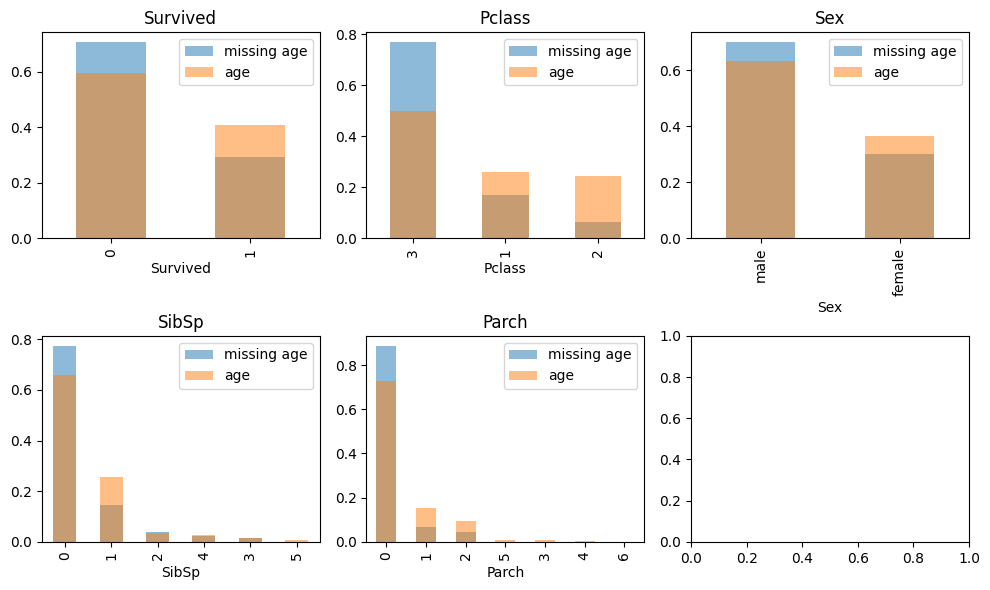

In [14]:
columnas = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch']
nrows = 2
ncols = 3

d_missing = df[df['Age'].isnull()]
d_present = df[~df['Age'].isnull()]


fig, ax = plt.subplots(nrows=2, ncols=3, squeeze=False, figsize=(10,6))

for i_col, col in enumerate(columnas):
    i_ax = ax[i_col//ncols][i_col%(nrows+1)]
    i_ax.set_title(f'{col}')
    d_missing[col].value_counts().div(len(d_missing)).plot(kind='bar', ax=i_ax, color='tab:blue',
                                                        alpha=0.5, label='missing age')
    d_present[col].value_counts().div(len(d_present)).plot(kind='bar', ax=i_ax, color='tab:orange',
                                                        alpha=0.5, label='age')
    i_ax.legend()

fig.tight_layout()


Vemos que los valores con datos faltantes en la edad se concentran sobretodo en los que
de tercera clase, hombres, que no sobrevivieron y sin parientes en el barco.

### Imputación

Imputaremos por los grupos 'Pclass' y 'Sex' para tener una imputación representativa

In [15]:
# Imputaciónp or la media pero teniendo en cuenta las variables de Pclass y Sex.
df['Age'] = df['Age'].fillna(df.groupby(['Pclass','Sex'])['Age'].transform("mean"))
print(df['Age'][df['Age'].isnull()])

Series([], Name: Age, dtype: float64)


## Ejemplo 3.3 Normalización Min-Max

A modo de ejemplo, normalizaremos entre la tarifa del Titanic `Fare`

In [16]:
# sin normalizar
df['Fare'].describe()

,Fare
count,891.000000
mean,32.204208
std,49.693429
min,0.000000
25%,7.910400
50%,14.454200
75%,31.000000
max,512.329200


In [17]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

df['fare_norm'] = min_max_scaler.fit_transform(df[['Fare']])
df['fare_norm'].describe()

,fare_norm
count,891.000000
mean,0.062858
std,0.096995
min,0.000000
25%,0.015440
50%,0.028213
75%,0.060508
max,1.000000


## Ejemplo 3.4 Z-score

A modo de ejemplo, estandarizaremos la variable `Fare` y la representaremos gráficamente.

In [18]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

df['fare_standard'] = standard_scaler.fit_transform(df[['Fare']])
df['fare_standard'].describe()

,fare_standard
count,8.910000e+02
mean,3.987333e-18
std,1.000562e+00
min,-6.484217e-01
25%,-4.891482e-01
50%,-3.573909e-01
75%,-2.424635e-02
max,9.667167e+00


<Axes: >

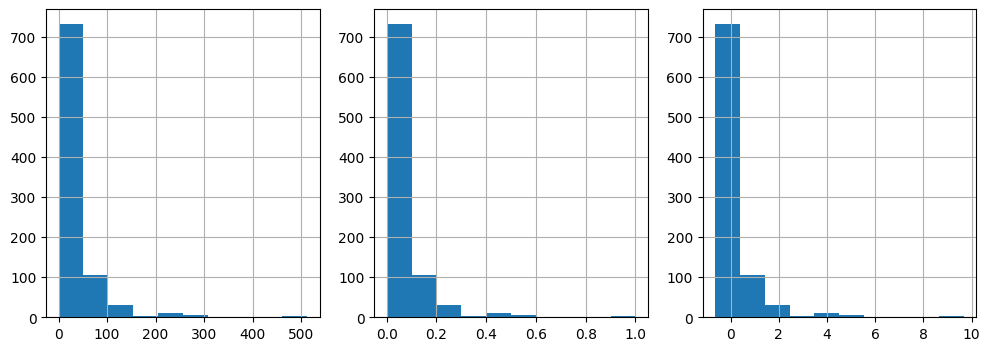

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=3, squeeze=False, figsize=(12,4))
df['Fare'].hist(ax=ax[0][0])
df['fare_norm'].hist(ax=ax[0][1])
df['fare_standard'].hist(ax=ax[0][2])